### Batch Gradient Descent - Comparison For Different Learning Rate

Constants used in this example:
- `LEARNING_RATE` - 0.005, 0.5, 5
- `MAX_ITERATION` - 1000
- `MAX_COST_DIFF` - 1e-10

In [82]:
# Install requirements
# %pip install matplotlib

In [83]:
import os
import matplotlib.pyplot as plt

`normalize()` &nbsp; Returns a list of normalized column (z-standardization)
<br><br>
`linspace()` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Alternative to `numpy.linspace()`
<br><br>
`read_csv()` &nbsp;&nbsp;&nbsp;&nbsp; Returns a tuple containing `X` and `Y` column
<br><br>
`fit()`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Perform linear regression on given `X` and `Y` dataset

In [84]:
def normalize(array):
    # z-standardization
    mean = sum(array) / len(array)
    sum_of_squares = sum((i - mean) ** 2 for i in array)
    standard_deviation = (sum_of_squares  / len(array)) ** 2

    return [(i - mean) / standard_deviation for i in array]

def linspace(start = 0, end = 25, total = 25):
    step_size = (end - start) / total
    array = [start]

    for _ in range(total):
        array.append(array[-1] + step_size)
    
    return array

def read_csv(file1, file2):
    if not os.path.exists(file1):
        raise FileNotFoundError(f"{file1}: File not found")
    

    if not os.path.exists(file2):
        raise FileNotFoundError(f"{file2}: File not found")
    
    x = []
    y = []
    with open(file1) as x_dataset, open(file2) as y_dataset:
        for x_data, y_data in zip(x_dataset, y_dataset):
            x.append(float(x_data.strip()))
            y.append(float(y_data.strip()))
    
    return x, y

def fit(x, y, LEARNING_RATE, MAX_ITERATION, MIN_COST_DIFF):
    iteration = 0
    theta_0 = theta_1 = 0
    feature_count = len(x)
    cost_arr = [float("inf")]

    while True:
        iteration += 1

        sum_0 = sum_1 = sum_3 = 0

        start = 0 if iteration < 15 else iteration - 15
        end = 29 if iteration < 15 else feature_count - 1 if iteration + 15 >= feature_count else iteration + 15 - 1

        for i in range(start, end):
            actual = y[i]
            predicted = theta_0 + theta_1 * x[i]

            error = predicted - actual

            sum_0 += error
            sum_1 += error * x[i]
    
        grad_0 = sum_0 / feature_count
        grad_1 = sum_1 / feature_count

        theta_0 -= grad_0 * LEARNING_RATE
        theta_1 -= grad_1 * LEARNING_RATE

        for i in range(feature_count):
            actual = y[i]
            predicted = theta_0 + theta_1 * x[i]

            sum_3 += (predicted - actual) ** 2
    
        recent_cost = sum_3 / (2 * feature_count)
        cost_arr.append(recent_cost)

        if iteration >= MAX_ITERATION or abs(cost_arr[-1] - cost_arr[-2]) <= MIN_COST_DIFF:
            break
    
    return theta_0, theta_1, cost_arr

In [85]:
MAX_ITERATION = 1000
MIN_COST_DIFF = 1e-10

Read `X` and `Y` column from `./datasets/linearX.csv` and `./datasets/linearY.csv` respectively

In [86]:
x, y = read_csv("./datasets/linearX.csv", "./datasets/linearY.csv")
iteration = 0

x = normalize(x)

Actual implementation of Linear Regression

In [87]:
theta_01, theta_11, cost_1 = fit(x, y, 5, MAX_ITERATION, MIN_COST_DIFF)
theta_02, theta_12, cost_2 = fit(x, y, 0.5, MAX_ITERATION, MIN_COST_DIFF)
theta_03, theta_13, cost_3 = fit(x, y, 0.05, MAX_ITERATION, MIN_COST_DIFF)

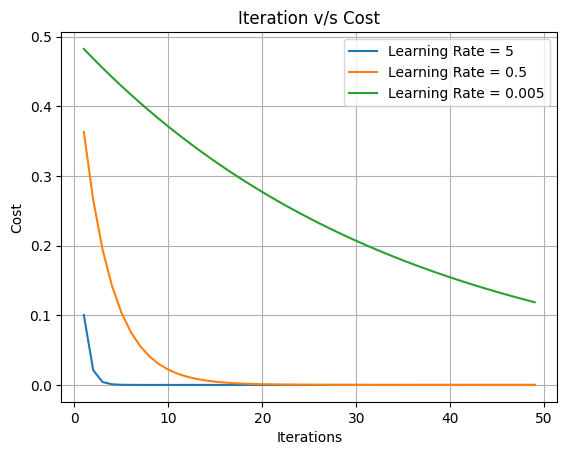

In [88]:
import matplotlib.pyplot as plt

plt.plot(range(50), cost_1[:50], label="Learning Rate = 5")
plt.plot(range(50), cost_2[:50], label="Learning Rate = 0.5")
plt.plot(range(50), cost_3[:50], label="Learning Rate = 0.005")
plt.legend()
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Iteration v/s Cost")
plt.show()
plt.close()